In [1]:
%matplotlib inline 
from matplotlib import pyplot as plt
plt.style.use('dark_background')
import pandas as pd
import numpy as np
import seaborn as sns

# Download Data

In [2]:
from toolkit import ObtainData, ProcessData

In [3]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = "datasets/housing"
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz"

In [4]:
obt = ObtainData()

In [5]:
# obt.fetch_data(HOUSING_URL, HOUSING_PATH, "housing.tgz") 

# Taking a look a the data

In [6]:
housing = obt.loadData(HOUSING_PATH,'housing.csv')

In [7]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


&#8595; I am looking to see how many catergories there are in the `ocean_proximity` column

In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

&#8593; There are 5 categories under ocean proximity

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


&#8595; I am plotting a histogram that shows the counts per bin

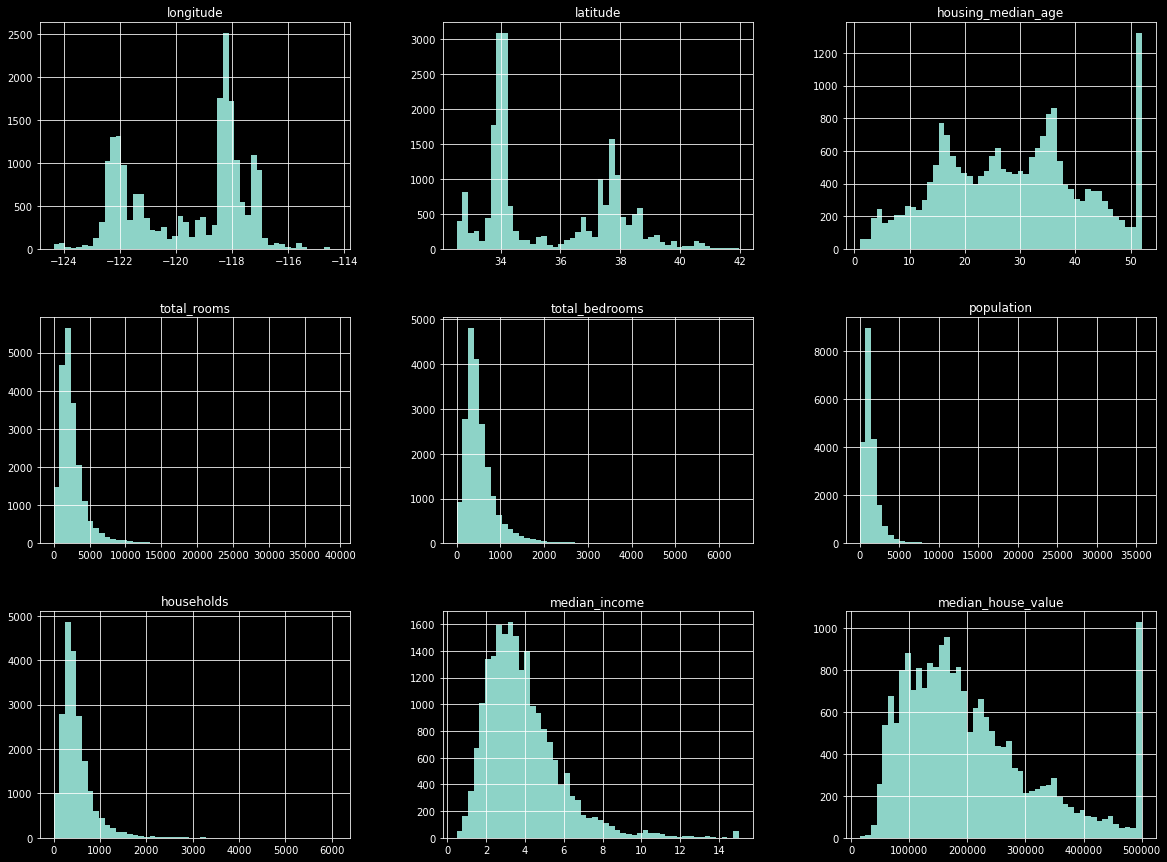

In [11]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

# Creating Test Set

&#8595; I have learned that the median income is a very important attribute to predicting the housing price. I want to make sure that the test data is representative of the various categories of income.
I will create an income category attribute because the income attribute is continuous. 

&#8595; I have created an income category attribute and called it `income_cat`

In [12]:
housing['income_cat'] = np.ceil(housing.median_income/1.5) #I divide by 1.5 to limit the number of income categories and use np.ceil to round up
housing.income_cat.where(housing.income_cat<5, 5, inplace=True) #categories above 5 are all merged into category 5

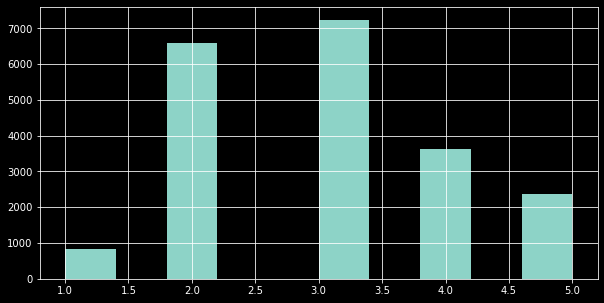

In [13]:
housing.income_cat.hist(figsize=(10,5))
plt.show()

- &#8593; I can see that the income categories are not distributed evenly.
- &#8595; I will create a test and training data by using stratified sampling to make the sets representative of the data

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing.income_cat):
    train_data = housing.iloc[train_index]
    test_data = housing.iloc[test_index]

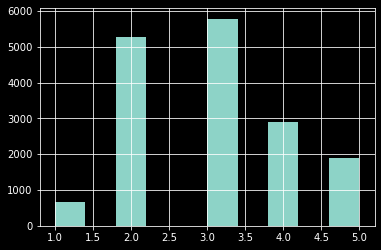

In [15]:
train_data.income_cat.hist()
plt.show()

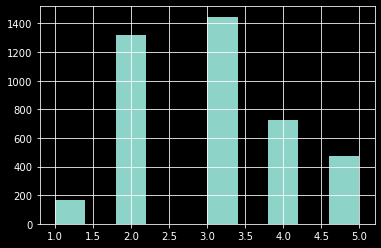

In [16]:
test_data.income_cat.hist()
plt.show()

&#8593; The train and test data are representative of the original dataset

&#8595; I am converting the data back to its original state by removing the `income_cat` column

In [17]:
for data in [train_data, test_data]:
    data.drop(['income_cat'], inplace=True, axis=1)

/Users/wishbert/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


&#8595; I am saving the training and test data to files to save computation time

In [18]:
test_data.to_csv('datasets/train_test_data/test_data.csv', index=False)
train_data.to_csv('datasets/train_test_data/train_data.csv', index=False)

# Exploring and Visualizing the data

In [19]:
train_data = pd.read_csv('datasets/train_test_data/train_data.csv')

In [20]:
housing = train_data.copy()

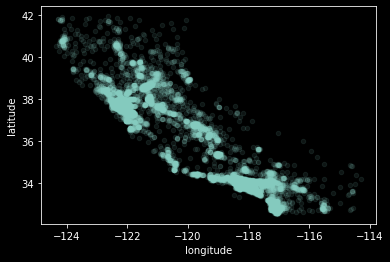

In [21]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)
plt.show()

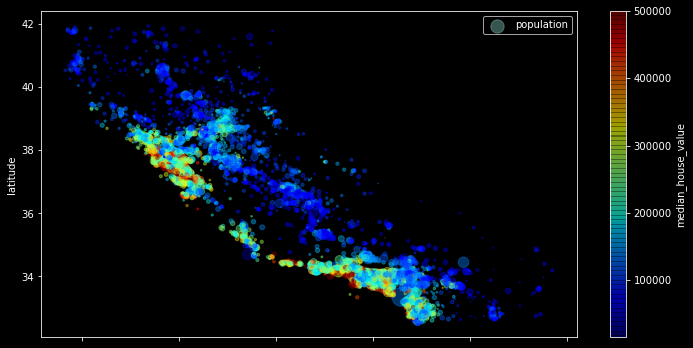

In [22]:
housing.plot(kind='scatter', x='longitude',y='latitude', alpha=0.4,
            s=housing['population']/100, label='population',
            c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            figsize=(12,6)
            )
plt.show()

## &#8595; I am looking at correlation between `median_house_value` and the attributes

In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

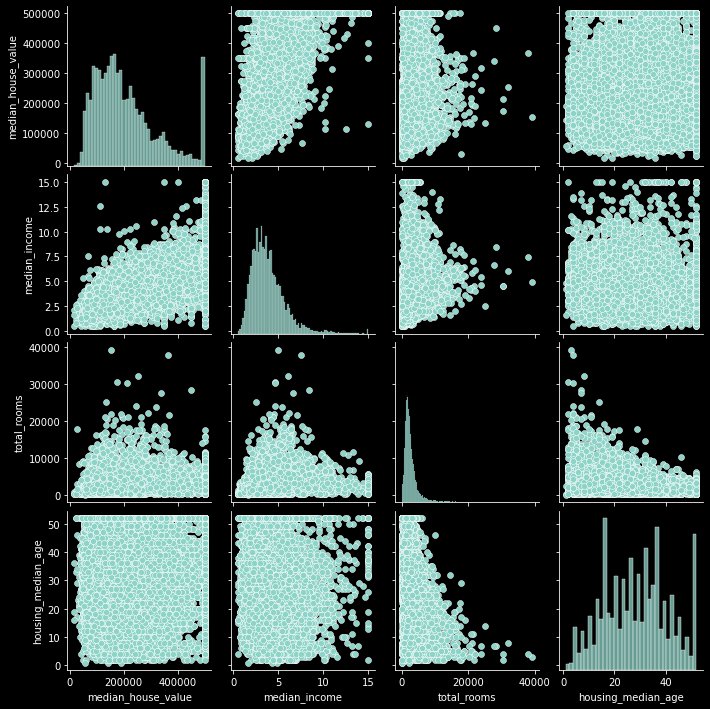

In [26]:
sns.pairplot(
    housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']],
    )
plt.show()

&#8595; The median income has the most highest correlation. I am taking a closer look

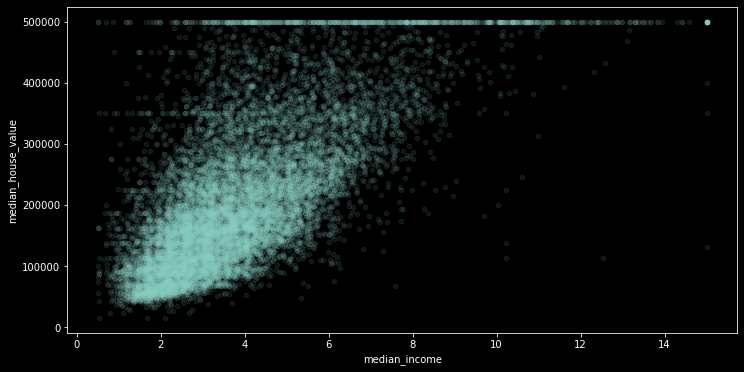

In [27]:
housing.plot(
    kind='scatter', 
    x='median_income', 
    y='median_house_value', 
    alpha=0.1,
    figsize=(12,6))
plt.show()

&#8593; The scatter plot reveals a cut of line at $500000 dollars, it also shows lines at $450000, $350000 and $280000. These lines may need to be removed so that the algorithm does not learn them.

## &#8595; Experimenting with attribute combination

housing

In [28]:
def make_combinations(df):
    '''This function combines attributes in the dataset to make new ones.
    
    Parameters
    ----------
        df : `pandas` DataFrame
            The dataset to which the combinations are to be applied.
            
    Returns
    -------
        `pandas` DataFrame
    '''

    df['rooms_per_household'] = df['total_rooms']/df['households']
    df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
    df['population_per_household'] = df['population']/df['households']

    return df

In [29]:
housing = make_combinations(housing)

&#8595; To check the correlation of the new attributes

In [30]:
corr_matrix = housing.corr()

In [31]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# Preparing data for machine learning algorithms 

&#8595; Reverting back to clean data

In [32]:
housing = train_data.drop('median_house_value', axis=1)
housing_labels = train_data['median_house_value'].copy()

In [33]:
median_value = housing['total_bedrooms'].median() #this value I will use to fill in the missing values of the total_bedroom attribute
housing.fillna(median_value, inplace=True)

In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy='median')

&#8595; I can only calculate the median on the numerical data so I will drop the `ocean_proximity` attribute

In [36]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [37]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_ #this are the medians of all the columns

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
X = imputer.transform(housing_num)

# &#8595; Custom Transformers

In [40]:
from sklearn.base import BaseEstimator, TransformerMixin


rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    '''This class combines housing attributes to create new attributes'''
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room #this adds an extra attribute if it is set to true

    def fit(self, X, y=None):
        return self # does not do anything

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/X[:, household_ix]
        population_per_household = X[:, population_ix]/X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix]/X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

class DataFrameSelector(BaseEstimator, TransformerMixin):
    '''This class selects a sub dataframe from a dataframe.
    
    Attributes
    ----------
        attribute_names: list
            This is the names of the attribute to select'''
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        return X[self.attribute_names].values

class CustomLabelBinarizer(TransformerMixin):

    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
        
    def fit(self, X, y=None):
        self.encoder.fit(X)
        return self

    def transform(self, X, y=None):
        return self.encoder.transform(X)

# &#8595; Transformation Pipeline

In [41]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, LabelBinarizer

In [42]:
num_attrib = list(housing_num)
cat_attrib = ['ocean_proximity']
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrib)),
    ('imputer',SimpleImputer(strategy='median')),
    ('attribute_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attrib)),
    ('label_binarizer', CustomLabelBinarizer())
])

complete_pipeline = FeatureUnion(
    transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline)
])

&#8593; This is the complete pipeline

# Selecting and Training a Model

## Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
housing_prepared = complete_pipeline.fit_transform(housing)

In [45]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [46]:
some_data = housing.iloc[:5]
labels = housing_labels.iloc[:5]

some_prepared_data = complete_pipeline.transform(some_data)
print(lin_reg.predict(some_prepared_data))
print(labels.values)


[210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]
[286600. 340600. 196900.  46300. 254500.]


In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
print('RMSE: ',np.sqrt(mean_squared_error(labels, lin_reg.predict(some_prepared_data))))

RMSE:  46578.63831786738


&#8593; The prediction error is not satisfying as most districts' median_housing_value ranges from the 120ks to the 260ks. This could be that the model is underfitting to the data.

## DecisionTreeRegressor

In [49]:
from sklearn.tree import DecisionTreeRegressor

In [50]:
tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
print(tree.predict(housing_prepared))
print(housing_labels.values)

[286600. 340600. 196900. ...  97800. 225900. 500001.]
[286600. 340600. 196900. ...  97800. 225900. 500001.]


In [52]:
print(
 'RMSE: ',
 np.sqrt(
     mean_squared_error(
         housing_labels, 
         tree.predict(housing_prepared)
         )
        )
    )

RMSE:  0.0


&#8593; The model has an error of zero this means that it has badly overfitted to the data

In [53]:
from sklearn.model_selection import cross_val_score

In [54]:
score = cross_val_score(
    tree,
    housing_num,
    housing_labels,
    scoring='neg_mean_squared_error',
    cv=10
)

In [55]:
print('scores:\n', np.sqrt(-score))
print()
print('mean: ', np.sqrt(-score).mean())
print()
print('std: ', np.sqrt(-score).std())

scores:
 [67842.67137629 68995.61893254 70047.60173326 70008.97609089
 69997.86635268 72103.98811636 70322.64713001 67173.75578257
 70992.27223231 73378.61406007]

mean:  70086.4011806972

std:  1746.6742174055971


&#8595; I am doing the cross validation on the linear model so I can compare

In [56]:
score = cross_val_score(
    lin_reg,
    housing_num,
    housing_labels,
    scoring='neg_mean_squared_error',
    cv=10
)

print('scores:\n', np.sqrt(-score))
print()
print('mean: ', np.sqrt(-score).mean())
print()
print('std: ', np.sqrt(-score).std())

scores:
 [68231.8739688  68498.24540696 69602.95540263 74953.53757784
 68963.39008985 72142.21999409 66587.92731065 69747.54809465
 73515.43621253 68938.5043212 ]

mean:  70118.16383792019

std:  2465.5991562420986


In [57]:
from sklearn.ensemble import RandomForestRegressor

In [58]:
forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [59]:
print('RMSE: ',np.sqrt(mean_squared_error(housing_labels, forest.predict(housing_prepared))))

RMSE:  18642.213628082263


In [60]:
forest_score = cross_val_score(
    forest,
    housing_prepared,
    housing_labels,
    cv=10,
    scoring='neg_mean_squared_error',
    
)

In [61]:
print('scores:\n', np.sqrt(-forest_score))
print()
print('mean: ', np.sqrt(-forest_score).mean())
print()
print('std: ', np.sqrt(-forest_score).std())

scores:
 [49609.46789857 47823.30320349 50075.22532125 52350.52422589
 49721.46152868 53520.10140256 48457.3865481  48015.49327311
 52898.69373153 50340.21638462]

mean:  50281.187351778746

std:  1921.8552832230798


&#8594; The goal as at the moment is to shortlist a couple of promising machine learning algorithms

# HyperParameter Tunning 

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
forest_reg = RandomForestRegressor()

In [64]:
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring='neg_mean_squared_error'
)

grid_search.fit(
    housing_prepared,
    housing_labels
)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [65]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [66]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [67]:
cvresults = grid_search.cv_results_
for mean_score, param in zip(cvresults['mean_test_score'], cvresults['params']):
    print(np.sqrt(-mean_score), param)

63623.099350968696 {'max_features': 2, 'n_estimators': 3}
55670.74922764538 {'max_features': 2, 'n_estimators': 10}
53060.231312404736 {'max_features': 2, 'n_estimators': 30}
60674.987904614594 {'max_features': 4, 'n_estimators': 3}
53376.39650317758 {'max_features': 4, 'n_estimators': 10}
50351.87469343828 {'max_features': 4, 'n_estimators': 30}
58225.10216340504 {'max_features': 6, 'n_estimators': 3}
52091.57228512692 {'max_features': 6, 'n_estimators': 10}
50032.68984656039 {'max_features': 6, 'n_estimators': 30}
59486.51743505976 {'max_features': 8, 'n_estimators': 3}
52356.502754971436 {'max_features': 8, 'n_estimators': 10}
50176.727317765864 {'max_features': 8, 'n_estimators': 30}
62039.86258745042 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54590.76390085446 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60810.970471554436 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52322.179914556924 {'bootstrap': False, 'max_features': 3, 'n_estimato

# Analysing the best models and their errors

### &#8595; looking for the best features that contribute the most to the predicting the median housing price

In [79]:
feature_importance = grid_search.best_estimator_.feature_importances_

In [83]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
encoded = list(housing['ocean_proximity'].value_counts().index)
sorted(zip(feature_importance, list(housing_num)+extra_attribs+encoded), reverse=True)

[(0.35429938484492346, 'median_income'),
 (0.13895720525098243, 'INLAND'),
 (0.10616438194404669, 'pop_per_hhold'),
 (0.08417425623686452, 'bedrooms_per_room'),
 (0.07262590510020585, 'longitude'),
 (0.06247156694789297, 'latitude'),
 (0.04481293319581214, 'rooms_per_hhold'),
 (0.04336029872290189, 'housing_median_age'),
 (0.018097386604771015, 'population'),
 (0.0174963501111672, 'total_rooms'),
 (0.017041638718673556, 'total_bedrooms'),
 (0.016154724492043127, 'households'),
 (0.010752729893816397, '<1H OCEAN'),
 (0.007364830515932969, 'NEAR BAY'),
 (0.006189094975114587, 'ISLAND'),
 (3.731244485128595e-05, 'NEAR OCEAN')]

# Model Testing

In [84]:
final_model = grid_search.best_estimator_ #getting the best model to predict with

In [101]:
test_data = pd.read_csv('datasets/train_test_data/test_data.csv') #reading in the test data

In [94]:
X_test = test_data.drop(['median_house_value'], axis=1)
y_test = test_data['median_house_value'].copy()

In [96]:
X_test_prepared = complete_pipeline.transform(X_test) #preparing the data for prediction via the pipeline

In [98]:
final_prediction = final_model.predict(X_test_prepared)

In [99]:
final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

In [100]:
print('FINAL RMSE: ', final_rmse)

FINAL RMSE:  47970.717789004615
